##   R में Pandas का उपयोग

हमें R में pandas उपयोग के लिए dplyr लाइब्रेरी का उपयोग करना होगा। हम सामान्य डेटा साइंस लाइब्रेरी को इम्पोर्ट करने से शुरुआत करेंगे।


In [28]:
options(warn=-1)
library(dplyr)
library(tidyverse)
library(lubridate)
library(zoo)
library(xts)
library('ggplot2')

सीरीज़ एक सूची या 1D-ऐरे की तरह होती है, लेकिन इसमें इंडेक्स होता है। सभी ऑपरेशन्स इंडेक्स के साथ संरेखित होते हैं। R में पंक्ति की इंडेक्सिंग के लिए हमें row.names का उपयोग करना होता है।


In [29]:
a<- 1:9

In [30]:
b = c("I","like","to","use","Python","and","Pandas","very","much")

In [31]:
a1 = length(a)
b1 = length(b)

In [32]:
a = data.frame(a,row.names = c(1:a1))
print(a)

  a
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9


In [33]:
b = data.frame(b,row.names = c(1:b1))
print(b)

       b
1      I
2   like
3     to
4    use
5 Python
6    and
7 Pandas
8   very
9   much


सिरीज़ का एक सामान्य उपयोग टाइम सिरीज़ है। टाइम सिरीज़ में, इंडेक्स की एक विशेष संरचना होती है - आमतौर पर तारीखों या डेटटाइम्स की एक रेंज। टाइम सिरीज़ बनाने का सबसे आसान तरीका ts फ़ंक्शन का उपयोग करना है। लेकिन हम टाइम सिरीज़ को लागू करने का एक और तरीका आज़माएंगे। हमें seq फ़ंक्शन का उपयोग करके तारीखों का इंडेक्स बनाने के लिए lubridate लाइब्रेरी का उपयोग करना होगा।

मान लीजिए हमारे पास एक सिरीज़ है जो दिखाती है कि हर दिन कितने उत्पाद खरीदे गए, और हमें पता है कि हर रविवार हमें अपने लिए एक अतिरिक्त आइटम भी लेना होता है। यहाँ सिरीज़ का उपयोग करके इसे मॉडल करने का तरीका दिया गया है:


In [34]:
# We will use ggplot2 for visualizing the data
# If you want to change the plot size repr library will be used
library(repr)
options(repr.plot.width = 12,repr.plot.height=6)

[1] "length of index is  366"


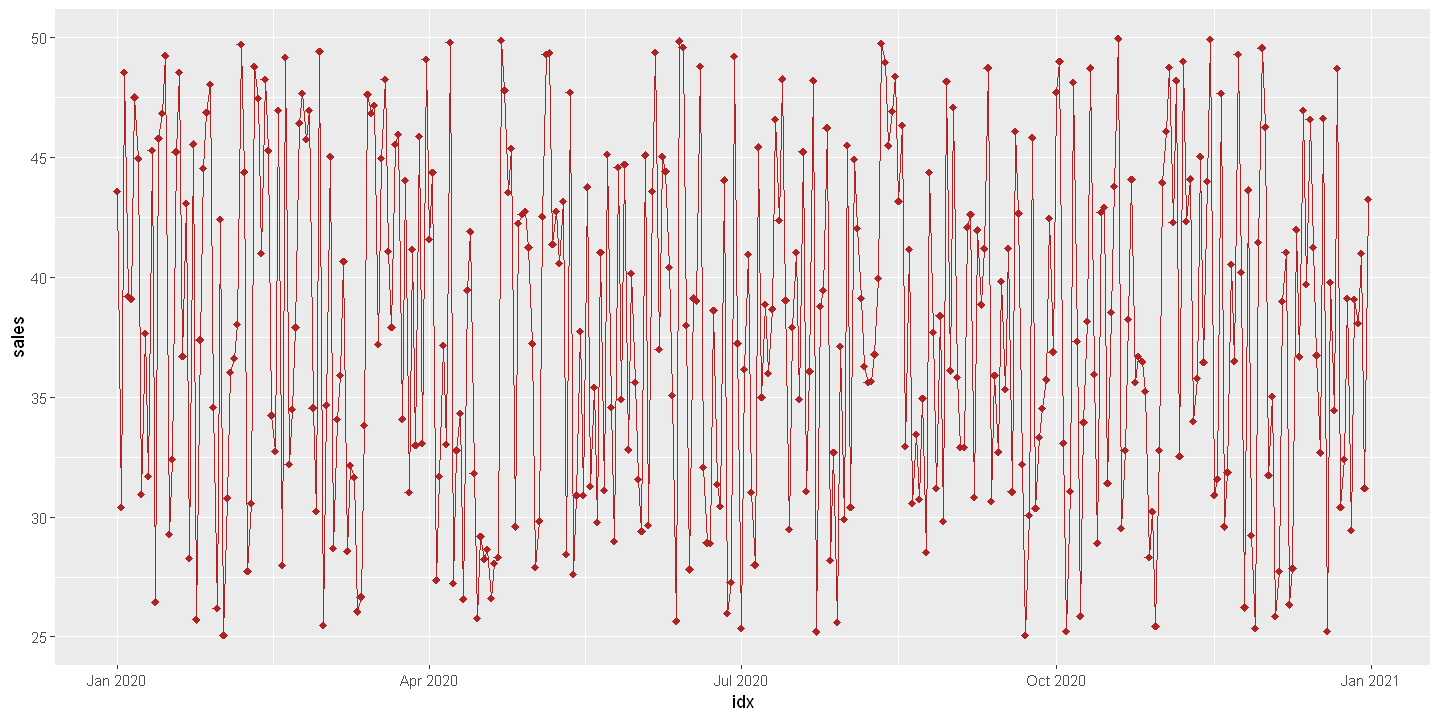

In [35]:
start_date <- mdy("Jan 1, 2020")
end_date <- mdy("Dec 31, 2020")
idx = seq(start_date,end_date,by ='day')
print(paste("length of index is ",length(idx)))
size = length(idx)
sales = runif(366,min=25,max=50)
sold_items <- data.frame(row.names=idx[0:size],sales)
ggplot(sold_items,aes(x=idx,y=sales)) + geom_point(color = "firebrick", shape = "diamond", size = 2) +
    geom_line(color = "firebrick", size = .3)

हम additional_items और sold_items को मर्ज कर रहे हैं ताकि हम कुल उत्पादों की संख्या का पता लगा सकें।  
जैसा कि आप देख सकते हैं, हमें यहां कुल संख्या का पता लगाने में समस्या हो रही है, हमें NaN मान मिल रहा है क्योंकि साप्ताहिक श्रृंखला में जिन दिनों का उल्लेख नहीं किया गया है उन्हें गायब (NaN) माना जाता है। यदि हम NaN को किसी संख्या में जोड़ते हैं, तो हमें NaN मिलता है।  
जोड़ करने के लिए, हमें NaN को 0 से बदलने की आवश्यकता है।  


In [36]:
index = seq(start_date,end_date,by = 'week')
sz = length(index)
additional_product <- rep(10,53)
additional_items  <- data.frame(row.names = index[0:sz],additional_product)
additional_items
# we are merging two dataframe so that we can add
additional_item = merge(additional_items,sold_items, by = 0, all = TRUE)[-1] 
total  = data.frame(row.names=idx[0:size],additional_item$additional_product + additional_item$sales)
colnames(total) =  c('total')
total

additional_product
2020-01-01 10                
2020-01-08 10                
2020-01-15 10                
2020-01-22 10                
2020-01-29 10                
2020-02-05 10                
2020-02-12 10                
2020-02-19 10                
2020-02-26 10                
2020-03-04 10                
2020-03-11 10                
2020-03-18 10                
2020-03-25 10                
2020-04-01 10                
2020-04-08 10                
2020-04-15 10                
2020-04-22 10                
2020-04-29 10                
2020-05-06 10                
2020-05-13 10                
2020-05-20 10                
2020-05-27 10                
2020-06-03 10                
2020-06-10 10                
2020-06-17 10                
2020-06-24 10                
2020-07-01 10                
2020-07-08 10                
2020-07-15 10                
2020-07-22 10                
2020-07-29 10                
2020-08-05 10                
2020-08-12 10                
2020-08-19 10                
2020-08-26 10                
2020-09-02 10                
2020-09-09 10                
2020-09-16 10                
2020-09-23 10                
2020-09-30 10                
2020-10-07 10                
2020-10-14 10                
2020-10-21 10                
2020-10-28 10                
2020-11-04 10                
2020-11-11 10                
2020-11-18 10                
2020-11-25 10                
2020-12-02 10                
2020-12-09 10                
2020-12-16 10                
2020-12-23 10                
2020-12-30 10

total   
2020-01-01 53.59979
2020-01-02       NA
2020-01-03       NA
2020-01-04       NA
2020-01-05       NA
2020-01-06       NA
2020-01-07       NA
2020-01-08 40.93455
2020-01-09       NA
2020-01-10       NA
2020-01-11       NA
2020-01-12       NA
2020-01-13       NA
2020-01-14       NA
2020-01-15 59.24704
2020-01-16       NA
2020-01-17       NA
2020-01-18       NA
2020-01-19       NA
2020-01-20       NA
2020-01-21       NA
2020-01-22 38.26416
2020-01-23       NA
2020-01-24       NA
2020-01-25       NA
2020-01-26       NA
2020-01-27       NA
2020-01-28       NA
2020-01-29 44.58327
2020-01-30       NA
...        ...     
2020-12-02 41.74811
2020-12-03       NA
2020-12-04       NA
2020-12-05       NA
2020-12-06       NA
2020-12-07       NA
2020-12-08       NA
2020-12-09 37.85650
2020-12-10       NA
2020-12-11       NA
2020-12-12       NA
2020-12-13       NA
2020-12-14       NA
2020-12-15       NA
2020-12-16 46.73560
2020-12-17       NA
2020-12-18       NA
2020-12-19       NA
2020-12-20       NA
2020-12-21       NA
2020-12-22       NA
2020-12-23 40.42143
2020-12-24       NA
2020-12-25       NA
2020-12-26       NA
2020-12-27       NA
2020-12-28       NA
2020-12-29       NA
2020-12-30 41.20298
2020-12-31       NA

In [37]:
additional_item[is.na(additional_item)] = 0
total  = data.frame(row.names=idx[0:size],additional_item$additional_product + additional_item$sales)
colnames(total) =  c('total')
total

total   
2020-01-01 53.59979
2020-01-02 30.41127
2020-01-03 48.54839
2020-01-04 39.20897
2020-01-05 39.09894
2020-01-06 47.53019
2020-01-07 44.94766
2020-01-08 40.93455
2020-01-09 37.66561
2020-01-10 31.68825
2020-01-11 45.30576
2020-01-12 26.45509
2020-01-13 45.81249
2020-01-14 46.84547
2020-01-15 59.24704
2020-01-16 29.28688
2020-01-17 32.41731
2020-01-18 45.23295
2020-01-19 48.54330
2020-01-20 36.69353
2020-01-21 43.09588
2020-01-22 38.26416
2020-01-23 45.56863
2020-01-24 25.70944
2020-01-25 37.38721
2020-01-26 44.53955
2020-01-27 46.88427
2020-01-28 48.05540
2020-01-29 44.58327
2020-01-30 26.19490
...        ...     
2020-12-02 41.74811
2020-12-03 35.03915
2020-12-04 25.84637
2020-12-05 27.73147
2020-12-06 39.00993
2020-12-07 41.03187
2020-12-08 26.33862
2020-12-09 37.85650
2020-12-10 41.98943
2020-12-11 36.68901
2020-12-12 46.96883
2020-12-13 39.70374
2020-12-14 46.59464
2020-12-15 41.24742
2020-12-16 46.73560
2020-12-17 32.68275
2020-12-18 46.64238
2020-12-19 25.22163
2020-12-20 39.79997
2020-12-21 34.45013
2020-12-22 48.71183
2020-12-23 40.42143
2020-12-24 32.41991
2020-12-25 39.12296
2020-12-26 29.43616
2020-12-27 39.09337
2020-12-28 38.09288
2020-12-29 41.00681
2020-12-30 41.20298
2020-12-31 43.25232

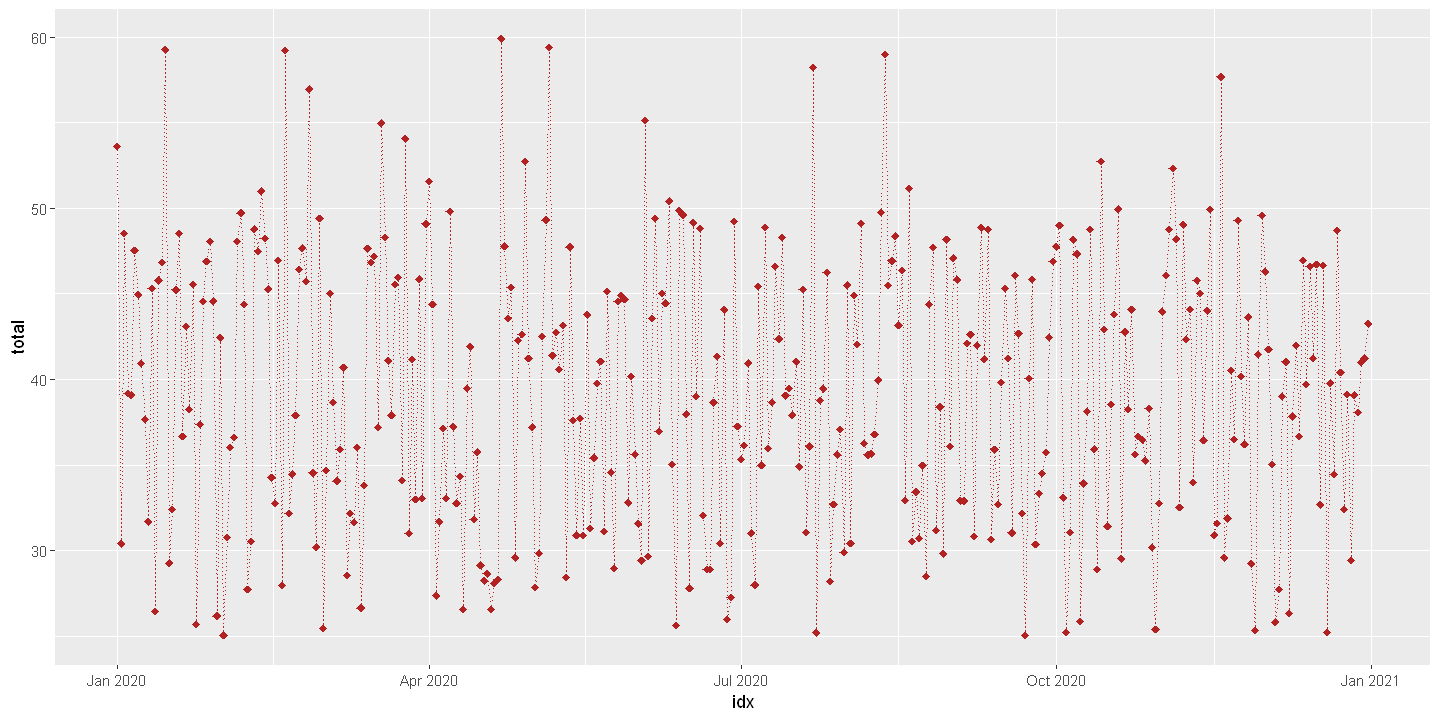

In [38]:
ggplot(total,aes(x=idx,y=total)) + geom_point(color = "firebrick", shape = "diamond", size = 2) +
    geom_line(color = "firebrick", linetype = "dotted", size = .3)

हम मासिक आधार पर कुल उत्पादों की संख्या का विश्लेषण करना चाहते हैं। इसलिए, हम एक महीने में कुल उत्पादों की संख्या का औसत निकालते हैं और एक बारग्राफ बनाते हैं।


In [39]:
index = seq(start_date,end_date,by ='month')


              total
2020-01-31 41.03847
2020-02-29 40.91568
2020-03-31 39.27424
2020-04-30 37.63589
2020-05-31 38.75129
2020-06-30 38.75744
2020-07-31 38.35212
2020-08-31 40.43712
2020-09-30 38.90043
2020-10-31 37.99855
2020-11-30 41.20759
2020-12-31 38.46355

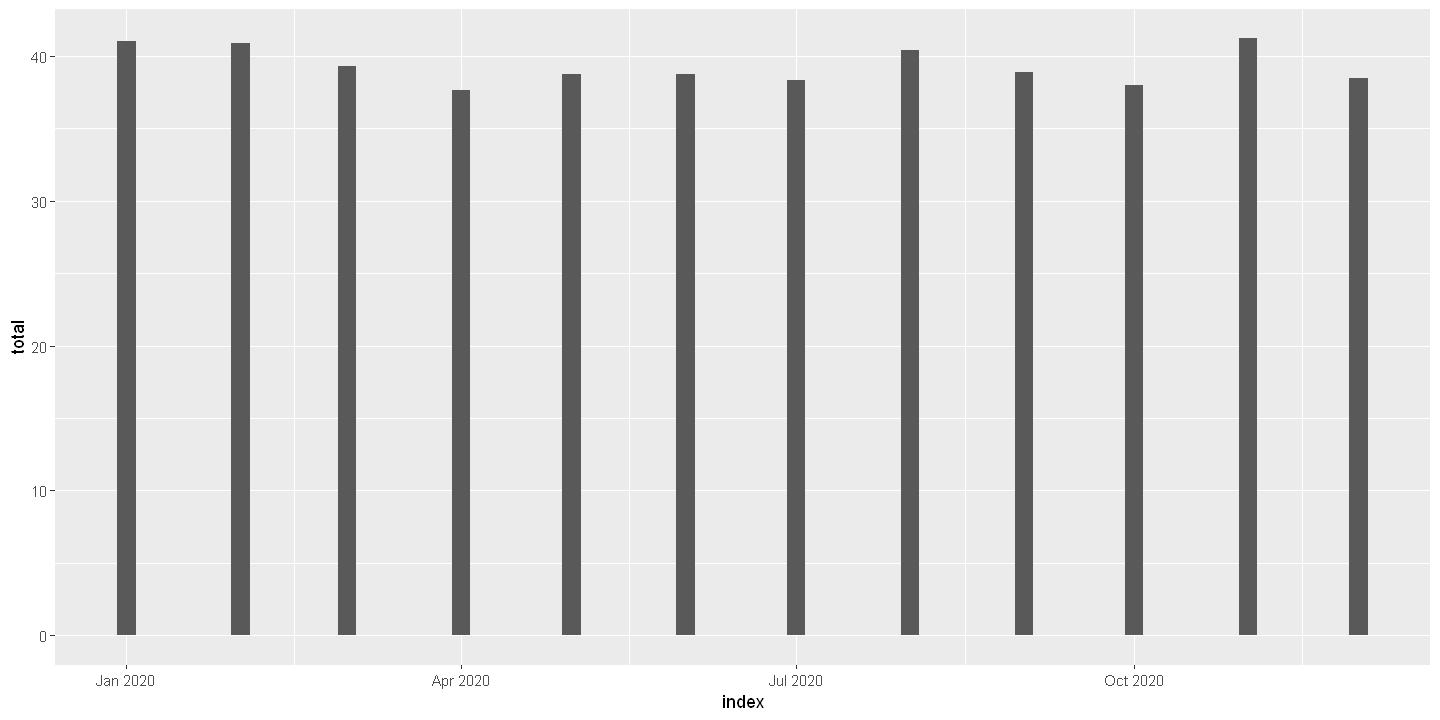

In [40]:
x<- as.xts(total, dateFormat ="Date")
(monthly<-apply.monthly(x,mean))
ggplot(monthly, aes(x=index, y=total)) + 
  geom_bar(stat = "identity", width=5) 

## डेटा फ्रेम
डेटा फ्रेम मूल रूप से एक ही इंडेक्स वाले सीरीज का संग्रह है। हम कई सीरीज को एक साथ मिलाकर एक डेटा फ्रेम बना सकते हैं।  
उदाहरण के लिए, हम a और b सीरीज का डेटा फ्रेम बना रहे हैं।


In [41]:
a = data.frame(a,row.names = c(1:a1))

In [42]:
b = data.frame(b,row.names = c(1:b1))

In [43]:
df<- data.frame(a,b)
df

a b     
1 1 I     
2 2 like  
3 3 to    
4 4 use   
5 5 Python
6 6 and   
7 7 Pandas
8 8 very  
9 9 much

हम पुनः नामकरण फ़ंक्शन का उपयोग करके कॉलम नाम भी बदल सकते हैं।


In [44]:
df = 
  rename(df,
    A = a,
    B = b,
  )

In [45]:
df

A B     
1 1 I     
2 2 like  
3 3 to    
4 4 use   
5 5 Python
6 6 and   
7 7 Pandas
8 8 very  
9 9 much

हम डेटा फ्रेम में एक कॉलम को select फ़ंक्शन का उपयोग करके भी चुन सकते हैं।


In [46]:
cat("Column A (series):\n")
select(df,'A')

Column A (series):


A
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9

हम उन पंक्तियों को निकालेंगे जो श्रृंखला पर एक निश्चित तार्किक मानदंड को पूरा करती हैं।


In [47]:
df[df$A<5,]

A B   
1 1 I   
2 2 like
3 3 to  
4 4 use

In [48]:
df[df$A>5 & df$A<7,]

A B  
6 6 and

नए कॉलम बनाना।

नीचे दिया गया कोड एक सीरीज़ बनाता है जो 'a' के औसत मान से उसका विचलन गणना करता है और फिर इसे मौजूदा डेटा फ्रेम में मर्ज करता है।


In [49]:
df$DivA <- df$A - mean(df$A)

In [50]:
df

A B      DivA
1 1 I      -4  
2 2 like   -3  
3 3 to     -2  
4 4 use    -1  
5 5 Python  0  
6 6 and     1  
7 7 Pandas  2  
8 8 very    3  
9 9 much    4

हम एक श्रृंखला बना रहे हैं जो A कॉलम की स्ट्रिंग की लंबाई की गणना करती है और फिर मौजूदा डेटा फ्रेम में विलय करती है।


In [51]:
df$LenB <- str_length(df$B)

In [52]:
df

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6   
6 6 and     1   3   
7 7 Pandas  2   6   
8 8 very    3   4   
9 9 much    4   4

संख्याओं के आधार पर पंक्तियों का चयन


In [53]:
df[0:5,]

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6

***समूह बनाना मतलब कई कॉलम्स को कुछ शर्तों के आधार पर समूहित करना होता है, और हम summarise फ़ंक्शन का उपयोग करके अंतर देख सकते हैं।***

मान लीजिए कि हम LenB के प्रत्येक मान के लिए कॉलम A का औसत मान निकालना चाहते हैं। तो हम अपने DataFrame को LenB के आधार पर समूहित कर सकते हैं और औसत निकालकर उन्हें a नाम दे सकते हैं।


In [54]:
df1 = df %>% group_by(LenB) %>% summarise(a = mean(A))

In [55]:
df1

LenB a       
1 1    1.000000
2 2    3.000000
3 3    5.000000
4 4    6.333333
5 6    6.000000

In [56]:
df2 = df %>% group_by(LenB) %>%
summarise(MEAN = mean(A),count =length(DivA))

## प्रिंटिंग और प्लॉटिंग
जब हम head(df) को कॉल करते हैं, तो यह डेटा फ्रेम को एक टेबल के रूप में प्रिंट करेगा।

किसी भी डेटा साइंस प्रोजेक्ट का पहला कदम डेटा की सफाई और विज़ुअलाइज़ेशन होता है, इसलिए डेटा सेट को विज़ुअलाइज़ करना और कुछ उपयोगी जानकारी निकालना महत्वपूर्ण है।


In [57]:
#dataset = read.csv("file name")

In [58]:
head(df)

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6   
6 6 and     1   3

ggplot2 एक बहुत अच्छी लाइब्रेरी है क्योंकि यह डेटा फ्रेम में डेटा से जटिल प्लॉट्स को सरलता से बनाने की सुविधा देती है।

यह यह निर्दिष्ट करने के लिए एक अधिक प्रोग्रामेटिक इंटरफ़ेस प्रदान करती है कि कौन से वेरिएबल्स को प्लॉट करना है, उन्हें कैसे प्रदर्शित किया जाए, और सामान्य दृश्य गुण।


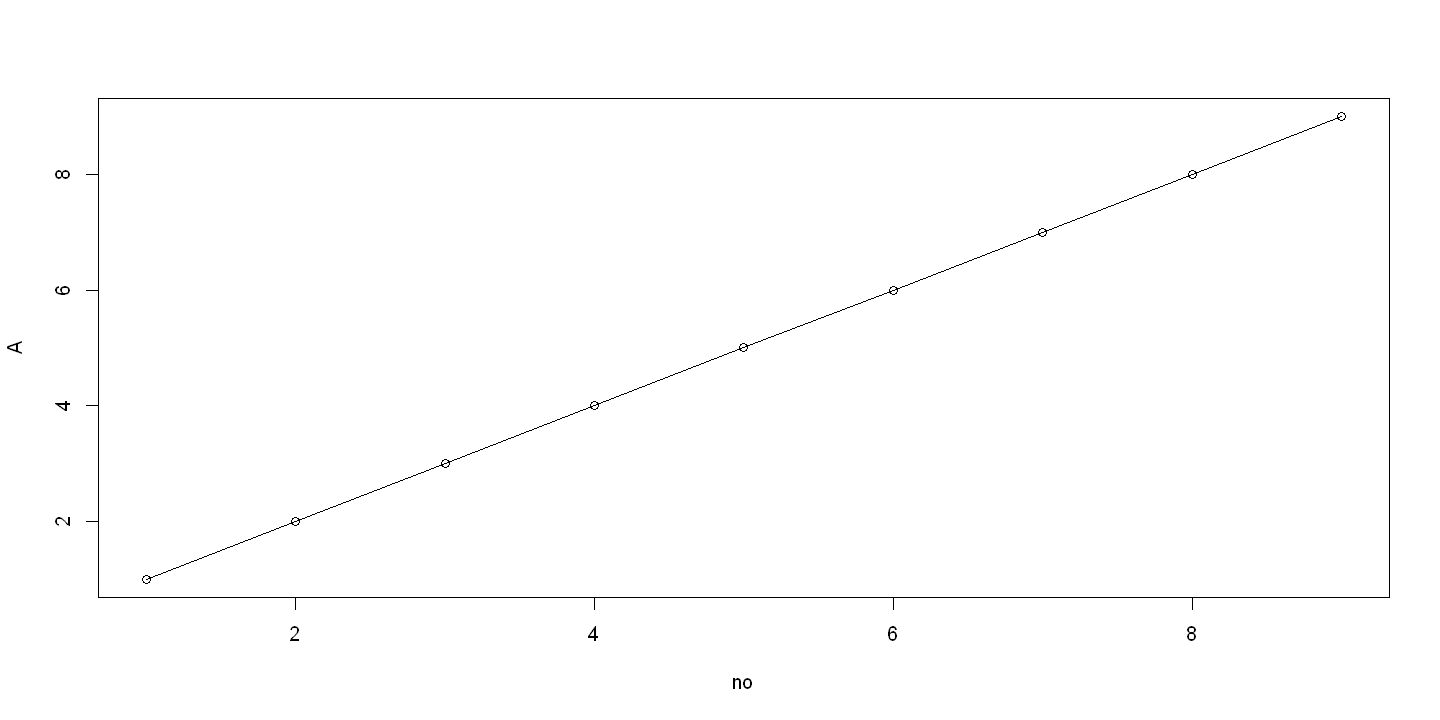

In [59]:
plot(df$A,type = 'o',xlab = "no",ylab = "A")

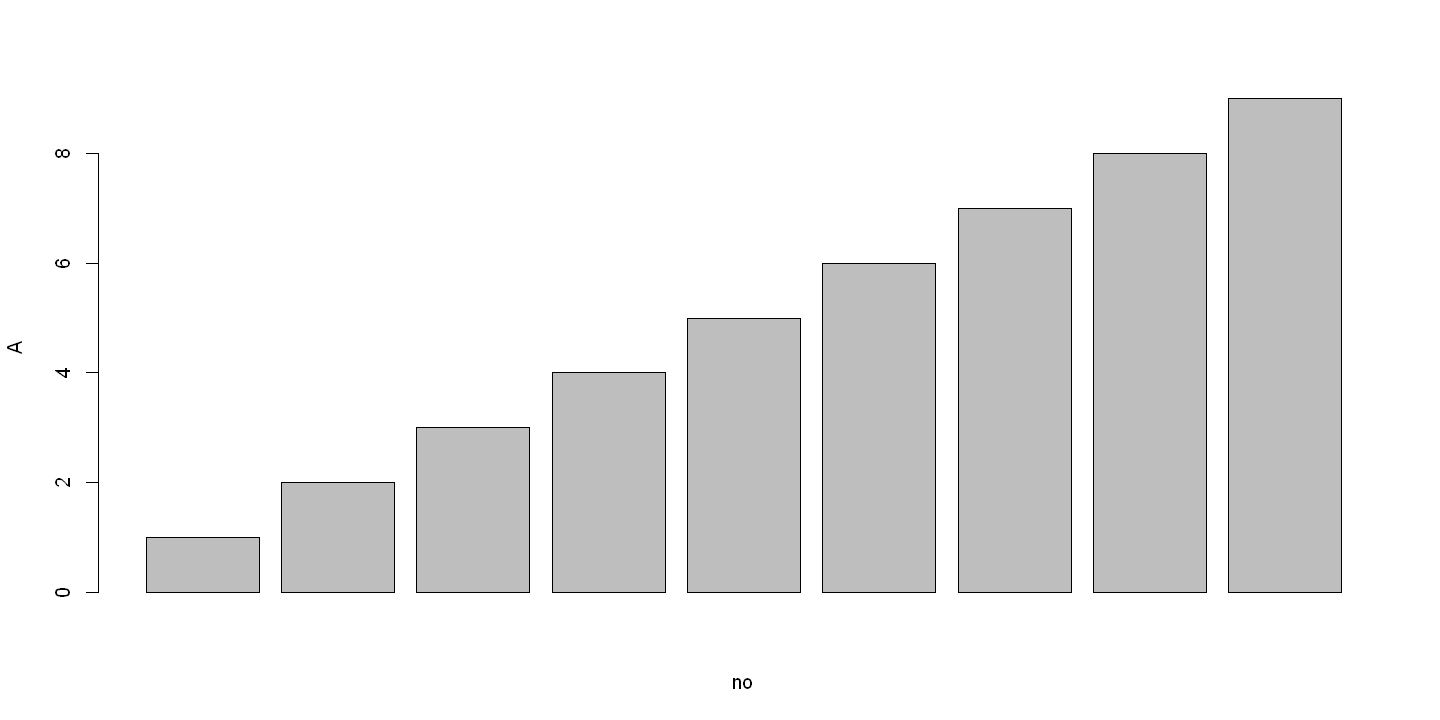

In [60]:
barplot(df$A, ylab = 'A',xlab = 'no')


---

**अस्वीकरण**:  
यह दस्तावेज़ AI अनुवाद सेवा [Co-op Translator](https://github.com/Azure/co-op-translator) का उपयोग करके अनुवादित किया गया है। जबकि हम सटीकता सुनिश्चित करने का प्रयास करते हैं, कृपया ध्यान दें कि स्वचालित अनुवाद में त्रुटियां या अशुद्धियां हो सकती हैं। मूल भाषा में उपलब्ध मूल दस्तावेज़ को प्रामाणिक स्रोत माना जाना चाहिए। महत्वपूर्ण जानकारी के लिए, पेशेवर मानव अनुवाद की सिफारिश की जाती है। इस अनुवाद के उपयोग से उत्पन्न किसी भी गलतफहमी या गलत व्याख्या के लिए हम जिम्मेदार नहीं हैं।
